# Project 2 : Ames Housing Project Suggestions

## Problem Statement

I work for the estate consultant who gives the recommendation about the house price. My customer is the estate company who want to invest in the housing market. The house demand growth expands every year in Iowa, therefore my customers want to know how to increase the house price and which features have high value of house.

## 1. Data cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline

### 1.1. Import data

All datasets are imported by using the Pandas library. The explanation for each dataset is following this.
- `df_train` is a variable for a dataset named train.csv which is the train data to build the model. This dataset has 81 columns with 2051 rows. No value in this is negative values that are shown on the statistic summary table. The data type for each table does not need changing.
- `df_test` is a variable for a dataset named test.csv which is the test data for house price prediction. This dataset has 80 columns with 879 rows. No value in this is negative values that are shown on the statistic summary table. The data type for each table does not need changing.

#### Train data

In [2]:
#Import dataset with pandas
df_train = pd.read_csv('datasets/train.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#Rename column to be the lower letter
df_train.columns = df_train.columns.str.lower()

In [4]:
#Check the number of row and column
df_train.shape

(2051, 81)

In [5]:
#Statistic summary
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas vnr area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [6]:
#Check the data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms subclass      2051 non-null   int64  
 3   ms zoning        2051 non-null   object 
 4   lot frontage     1721 non-null   float64
 5   lot area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot shape        2051 non-null   object 
 9   land contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot config       2051 non-null   object 
 12  land slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition 1      2051 non-null   object 
 15  condition 2      2051 non-null   object 
 16  bldg type        2051 non-null   object 
 17  house style   

#### Test data

In [7]:
#Import dataset with pandas
df_test = pd.read_csv('datasets/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
#Rename column to be lower letter
df_test.columns = df_test.columns.str.lower()

In [9]:
#Check number of row and column
df_test.shape

(879, 80)

In [10]:
#Statistic summary
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1435.0,2197.0,2.928000e+03
pid,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,535454160.0,907192140.0,1.007100e+09
ms subclass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,50.0,70.0,1.900000e+02
lot frontage,719.0,6.963004e+01,2.362537e+01,21.0,59.0,68.0,80.0,1.820000e+02
lot area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9453.0,11606.5,2.152450e+05
overall qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.0,7.0,1.000000e+01
overall cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.0,6.0,9.000000e+00
year built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1972.0,2000.0,2.010000e+03
year remod/add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1992.0,2003.0,2.010000e+03
mas vnr area,878.0,1.069829e+02,1.883568e+02,0.0,0.0,0.0,173.5,1.378000e+03


In [11]:
#Check the data type
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms subclass      879 non-null    int64  
 3   ms zoning        879 non-null    object 
 4   lot frontage     719 non-null    float64
 5   lot area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            58 non-null     object 
 8   lot shape        879 non-null    object 
 9   land contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot config       879 non-null    object 
 12  land slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition 1      879 non-null    object 
 15  condition 2      879 non-null    object 
 16  bldg type        879 non-null    object 
 17  house style     

### 1.2. Check and impute null values

- `df_train` has 26 missing value columns, `df_test` has 19 missing value columns
- From the data dictionary, missing value in some columns are **None** so this word is filled to missing values in all coulmns in variable named `fill_none_col` and `fill_none_col_test`. 
- For column that has missing values but is not be the continuous value, the column are stored in variable named `drop_col` and then are dropped. 
- For the continuous value, the column in variable `fill_median_col` are filled median to remove missing values as the imputing by the median of `mas vnr area`and `lot frontage` do not change the statistic significant.
- Some columns has 1 and 2 missing values and the row of missing values has missing value in other columns in the same row. These rows are dropped. The name of column for this process are stored in `drop_row`.

#### Training data

In [12]:
#Training data has 26 missing value columns
missing = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False), columns = ['training'])
missing_count = missing[missing['training'] >= 1]
missing_count

,training
pool qc,2042
misc feature,1986
alley,1911
fence,1651
fireplace qu,1000
lot frontage,330
garage finish,114
garage cond,114
garage qual,114
garage yr blt,114


In [13]:
list_missing_value_col = list(missing_count.index)
len(list_missing_value_col)

26

#### Statistic comparasion

- The statistic summary from 3 cases of imputation (median, mean and 0) show the median is the appropriate value to fill in missing value because the statistic does not change so much.

In [14]:
#
print('mas vnr area')
print('Statistic Summary')
print(df_train['mas vnr area'].describe())
print('Imput by median')
print(df_train['mas vnr area'].fillna(df_train['mas vnr area'].median()).describe())
print('Imput by mean')
print(df_train['mas vnr area'].fillna(df_train['mas vnr area'].mean()).describe())
print('Imput by 0')
print(df_train['mas vnr area'].fillna(0).describe())
print('')
print('-----------------------------')
print('')
print('lot frontage')
print('Statistic Summary')
print(df_train['lot frontage'].describe())
print('Imput by median')
print(df_train['lot frontage'].fillna(df_train['lot frontage'].median()).describe())
print('Imput by mean')
print(df_train['lot frontage'].fillna(df_train['lot frontage'].mean()).describe())
print('Imput by 0')
print(df_train['lot frontage'].fillna(0).describe())

mas vnr area
Statistic Summary
count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas vnr area, dtype: float64
Imput by median
count    2051.000000
mean       98.626524
std       174.324690
min         0.000000
25%         0.000000
50%         0.000000
75%       159.000000
max      1600.000000
Name: mas vnr area, dtype: float64
Imput by mean
count    2051.000000
mean       99.695909
std       174.021770
min         0.000000
25%         0.000000
50%         0.000000
75%       159.000000
max      1600.000000
Name: mas vnr area, dtype: float64
Imput by 0
count    2051.000000
mean       98.626524
std       174.324690
min         0.000000
25%         0.000000
50%         0.000000
75%       159.000000
max      1600.000000
Name: mas vnr area, dtype: float64

-----------------------------

lot frontage
Statistic Summary
count    1721.000000
mean       69.055200
std        

#### Fix missing values

- `list_missing_value_col` contains the column names which has missing values
- `fill_none_col` is the list of the column in the training dataset which needs to fill 'None'.
- `drop_col` is the column list that needs to be dropped.
- `fill_median_col` is the list of the column in train dataset which needs to fill median.
- `drop_row`is the column list that the missing value is 1 and 2. Row number 616 and 1327 are dropped.
- `fill_none_col_test` is the list of the column in the test dataset which needs to fill 'None'.

In [15]:
# Missing values are in the same row, so the row 616th and 1327th are dropped in the next cell.
display(df_train[df_train['bsmt half bath'].isnull()])
print('-------------')
display(df_train[df_train['bsmt full bath'].isnull()])
print('-------------')
display(df_train[df_train['bsmt unf sf'].isnull()])
print('-------------')
display(df_train[df_train['bsmtfin sf 2'].isnull()])
print('-------------')
display(df_train[df_train['total bsmt sf'].isnull()])
print('-------------')
display(df_train[df_train['bsmtfin sf 1'].isnull()])
print('-------------')
display(df_train[df_train['garage cars'].isnull()])
print('-------------')
display(df_train[df_train['garage area'].isnull()])

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


-------------


,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [16]:
list_missing_value_col = list(missing_count.index)

In [17]:
def fill_missing_value(data, list_col):
    
    """This function removes the missing values in 4 types
    1. fill 'None'
    2. drop column
    3. fill median
    4. drop row
    The inputs are data and list_col
    data = name of dataset
    list_col = list of column name which has missing values
    """
    
    fill_none_col = ['bsmt cond', 'bsmt qual', 'bsmtfin type 1', 'bsmtfin type 2', 'alley',
             'pool qc', 'misc feature', 'fence', 'garage cond', 'garage qual',
             'garage type', 'garage finish', 'fireplace qu', 'bsmt exposure']
    drop_col = ['mas vnr type', 'garage yr blt']
    fill_median_col = ['lot frontage', 'mas vnr area']
    drop_row = ['bsmt half bath', 'garage cars']
    fill_none_col_test = ['bsmt cond', 'bsmt qual', 'bsmtfin type 1', 'bsmtfin type 2', 'alley',
             'pool qc', 'misc feature', 'fence', 'garage cond', 'garage qual',
             'garage type', 'garage finish', 'fireplace qu', 'bsmt exposure', 'electrical']
    
    for col in list_col:
        if col in fill_none_col:
            data[col].fillna('None', inplace = True)
        elif col in drop_col:
            data.drop(columns = col, inplace = True)
        elif col in fill_median_col:
            data[col] = data[col].fillna(data[col].median())
        elif col in drop_row:
            data.dropna(subset =[col], inplace = True)
        elif col in fill_none_col_test:
            data[col].fillna('None', inplace = True)

In [18]:
fill_missing_value(data=df_train, list_col = list_missing_value_col)

In [19]:
#No missing values
missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False), columns = ['training'])
missing_count[missing_count['training'] >= 1]

,training


#### Testing Data

In [20]:
# 19 missing value columns
missing_count = pd.DataFrame(df_test.isnull().sum().sort_values(ascending = False), columns = ['testing'])
missing_count[missing_count['testing'] >= 1]

,testing
pool qc,875
misc feature,838
alley,821
fence,707
fireplace qu,422
lot frontage,160
garage cond,45
garage qual,45
garage yr blt,45
garage finish,45


In [21]:
list_missing_value_col_test = list(missing_count.index)

In [22]:
#Fix missing value by using function named 'fill_missing_value' that I created above.
fill_missing_value(data = df_test, list_col = list_missing_value_col_test)

In [23]:
missing_count = pd.DataFrame(df_test.isnull().sum().sort_values(ascending = False), columns = ['testing'])
missing_count[missing_count['testing'] >= 1]

,testing


#### Drop pid column

- `pid` column is dropped because the number of unique value is 2051 which equals the number of the row. This column does not have a benefit for prediction. 

In [24]:
df_train.drop(columns = 'pid', inplace = True)

In [25]:
df_test.drop(columns = 'pid', inplace = True)

#### Reset index

- Reset index after dropping

In [26]:
df_train.reset_index(drop=True, inplace = True)

In [27]:
df_test.reset_index(drop=True, inplace = True)

### 1.3. Consider discrete values are better represented as categorical.

The discrete value should be categorical values because relationships to the target are not linear which can be seen on the pair plot, and the histogram shows the almost discrete value distribution has no normal distribution.

In [28]:
discrete_col = ['year built', 'year remod/add', 'bsmt full bath', 'bsmt half bath',
                'full bath', 'half bath', 'bedroom abvgr', 'kitchen abvgr', 'totrms abvgrd', 'fireplaces',
                'garage cars', 'mo sold', 'yr sold']

In [29]:
len(discrete_col)

13

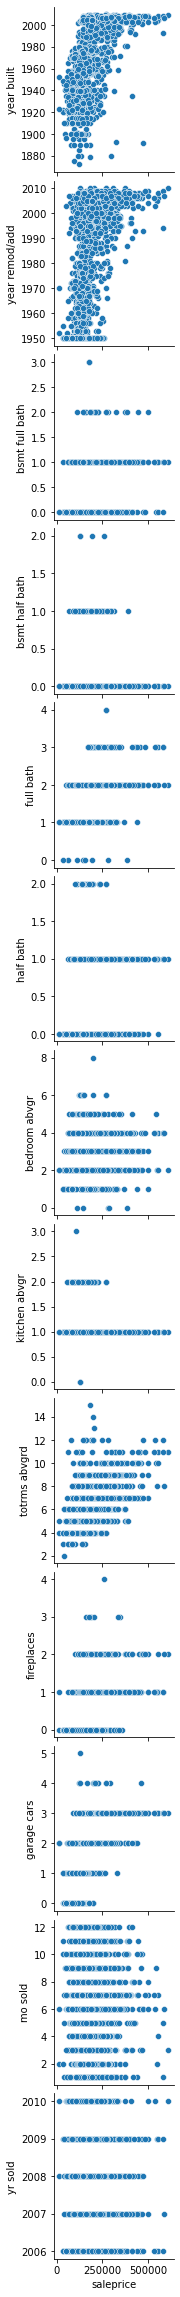

In [30]:
sns.pairplot(df_train, y_vars = discrete_col, x_vars = ['saleprice'], diag_kind = None);

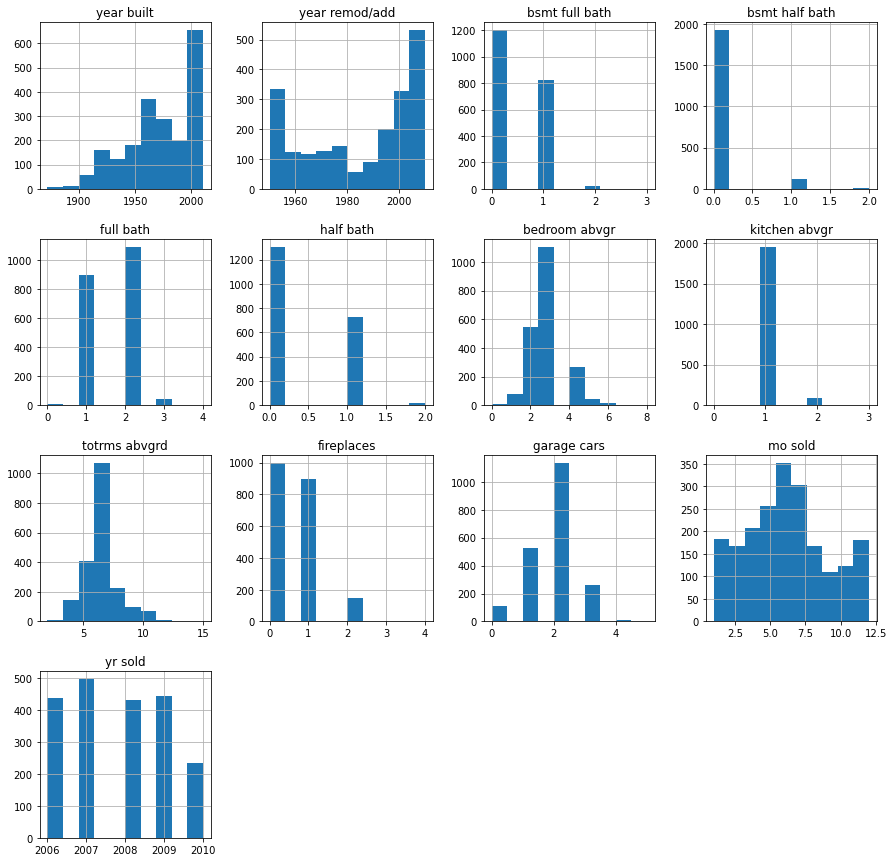

In [31]:
df_train[discrete_col].hist(figsize = (15,15));

### 1.4. Numerical columns: identify outliers

According to the discrete value are represented as categorical, the outlier in this dataset are identified from continuous values. The column is stored in `continuous_col`. The pair plot shows the distribution of values in each column. When value far from the point of crowed values, the value is identified as an outlier. I used this method instead of calculating from IQR or standard deviation because I would like to avoid cutting out a lot of rows that will decrease the data to train the model.

In [32]:
continuous_col = ['lot frontage', 'lot area', 'mas vnr area', 'bsmtfin sf 1', 'bsmtfin sf 2',
                  'bsmt unf sf', 'total bsmt sf', '1st flr sf', '2nd flr sf','low qual fin sf',
                  'gr liv area', 'garage area','wood deck sf', 'open porch sf', 'enclosed porch',
                  '3ssn porch','screen porch', 'pool area', 'misc val']

In [33]:
len(continuous_col)

19

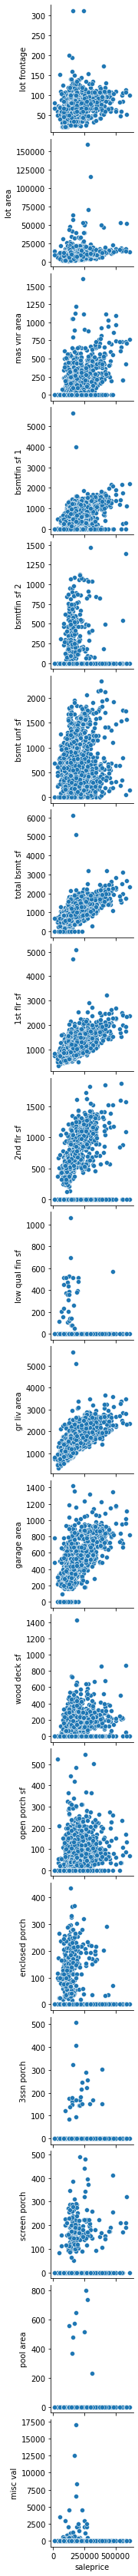

In [34]:
# Pairplot
sns.pairplot(df_train, y_vars = continuous_col, x_vars = ['saleprice'], diag_kind = None);

In [35]:
# Remove outlier
df_train = df_train[(df_train['lot frontage']< 150) & (df_train['lot area']< 75000) 
                    & (df_train['mas vnr area']< 1250) & (df_train['bsmtfin sf 1']< 3000) 
                    & (df_train['bsmtfin sf 2']< 1250) & (df_train['total bsmt sf']< 4000) 
                    & (df_train['1st flr sf']< 4000) & (df_train['low qual fin sf'] < 600) 
                    & (df_train['gr liv area']< 4000) & (df_train['garage area']< 1200) 
                    & (df_train['wood deck sf']< 1000) & (df_train['open porch sf']< 400) 
                    & (df_train['enclosed porch']< 400) & (df_train['3ssn porch']< 300) 
                    & (df_train['screen porch']< 400) & (df_train['misc val']< 10000)]

In [36]:
df_train.reset_index(drop=True, inplace = True)

In [37]:
df_train.shape

(2012, 78)

### 1.5 Select categories columns from box plot

- The boxplot of `cat_col` show the distribution of data. You can see that the boxplot in some features have no different level when compared with a sale price (boxes stay on the same level). But some features have a different level of the boxplot. I choose the features that have the boxplot shows the different value gives the different level of the sale price.
- `ms subclass`: the class of house have no trend with the sale price shown in the boxplot, such as the class 70, 75, 80, 85, 90 have the boxplot in the same level. 
- `ms zoning`: the boxplot shows the different house price in a different zone. The FV seems like the zone with the highest price.
- `street`, `alley`, `lot shape`, `land contour`, `utilities`, `lot config`, and `land slope`: These features has no trend with sale price when change type of them. Some features have a different level of the box but I think it has no extremely positive impact on the model.
- `neighborhood`, `condition 1` and `condition 2`: Different types make the changing of the house price.
- `overall qual`, `exter qual`, `exter cond`, `bsmt qual`, `bsmt exposure`, `electrical`, `kitchen qual`, `fireplace qu` and `heating qc`: The high score and high quality increase the price.

The columns that I choose are in `cat_col_selected`.

In [38]:
cat_col = [col for col in df_train.columns if col not in discrete_col and col not in continuous_col]

In [39]:
cat_col.remove('id')

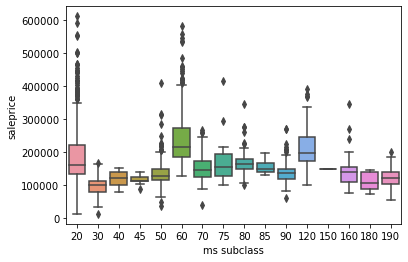

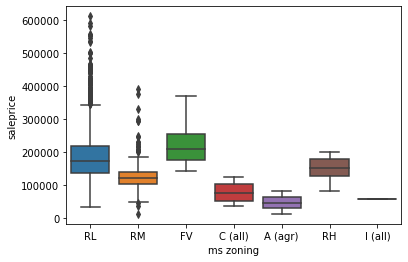

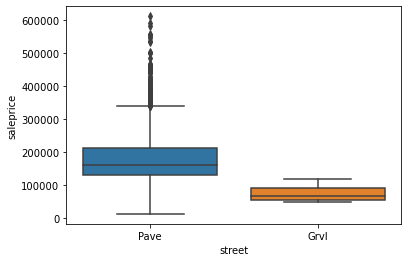

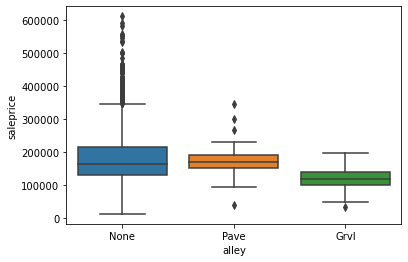

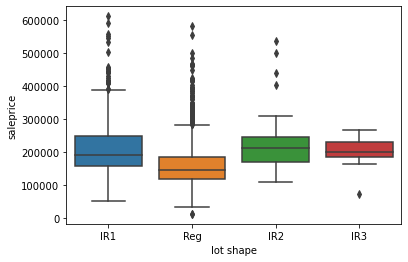

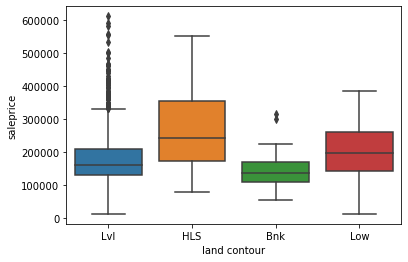

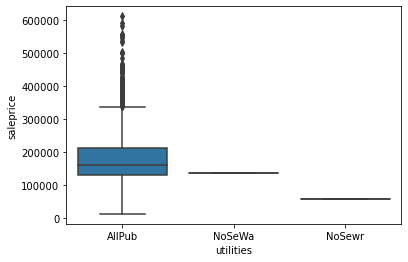

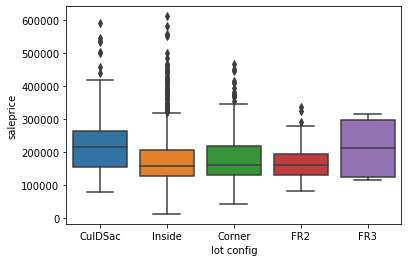

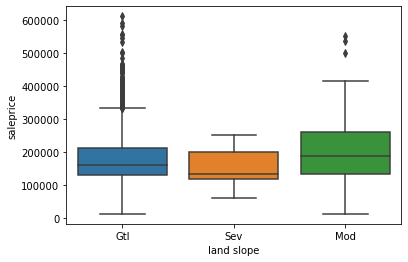

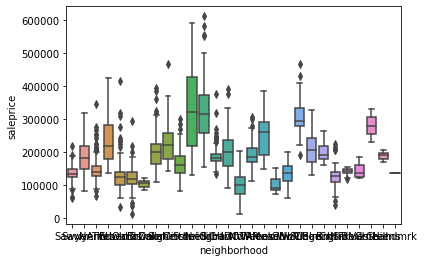

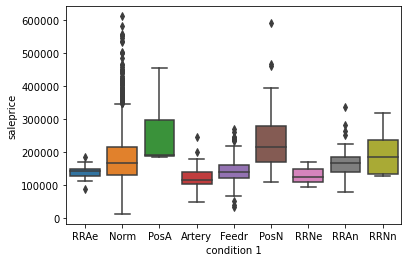

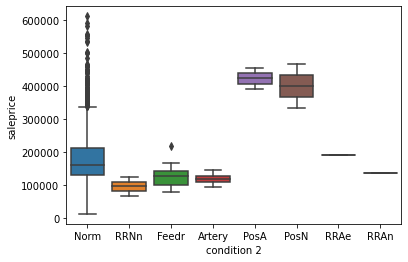

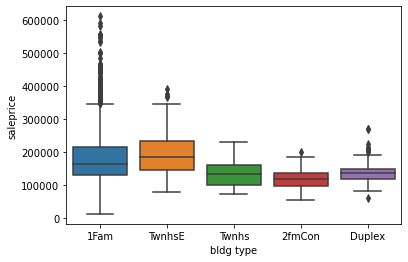

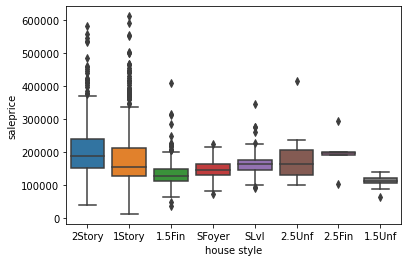

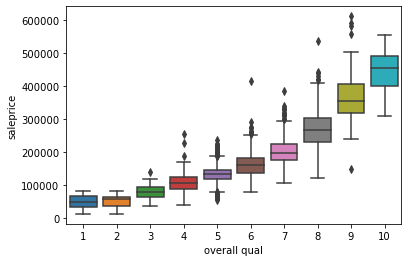

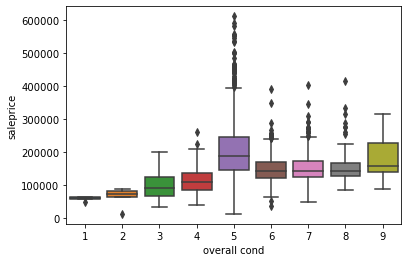

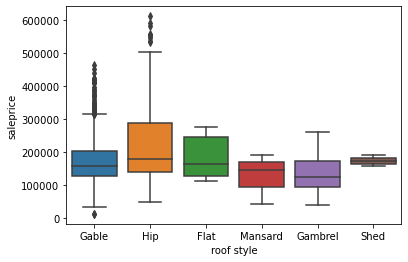

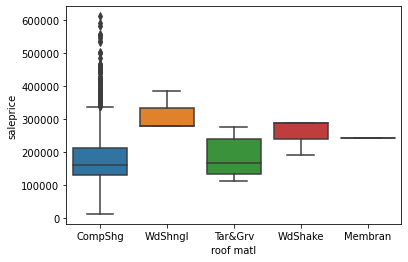

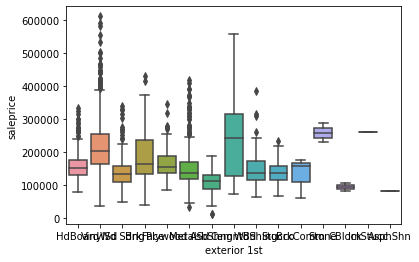

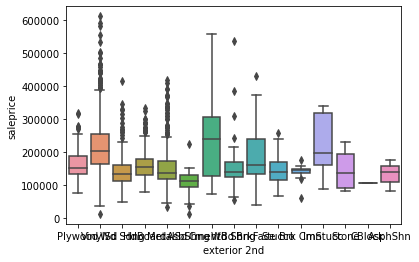

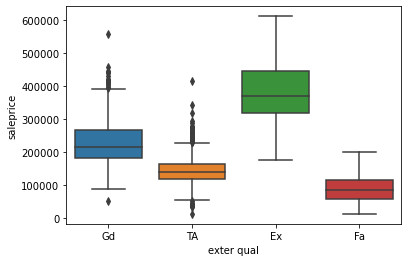

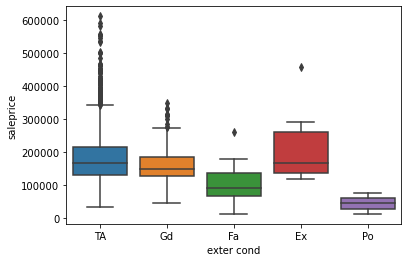

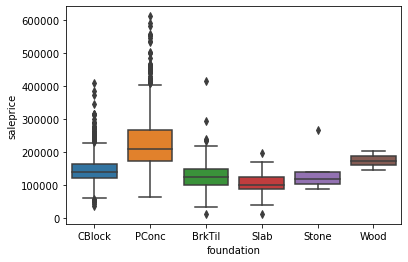

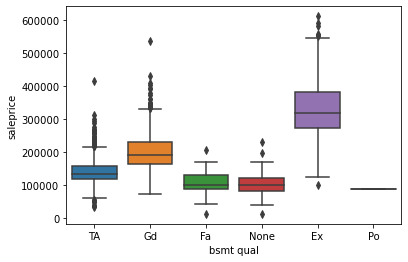

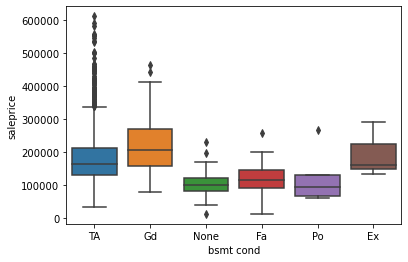

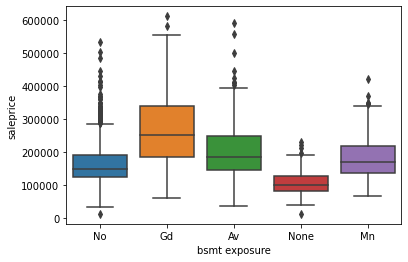

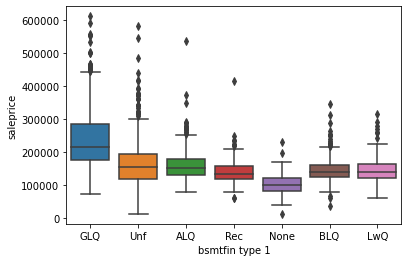

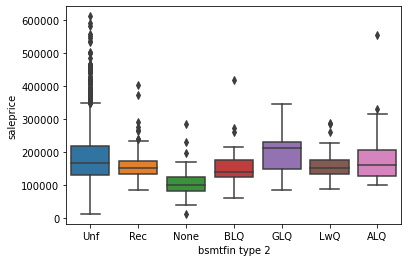

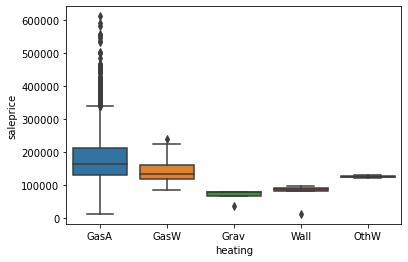

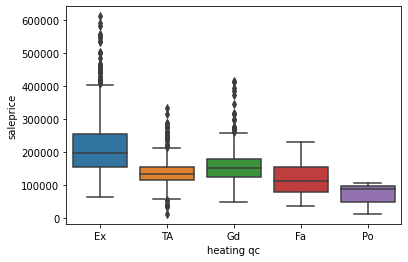

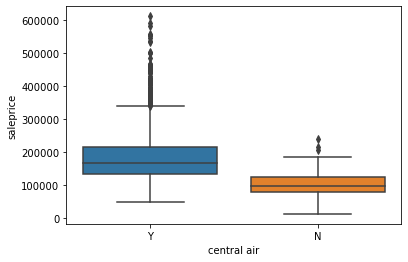

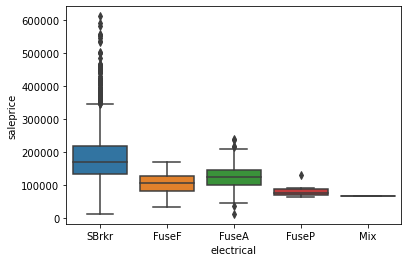

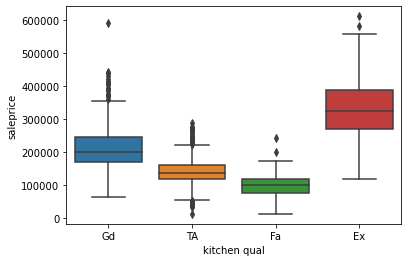

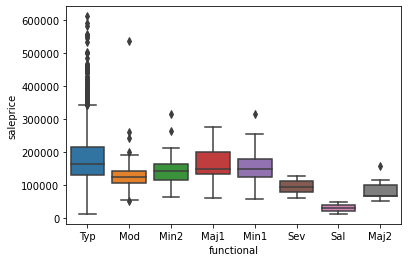

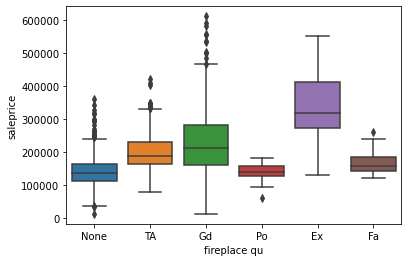

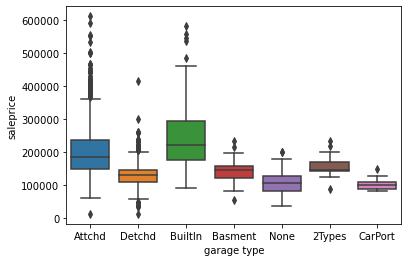

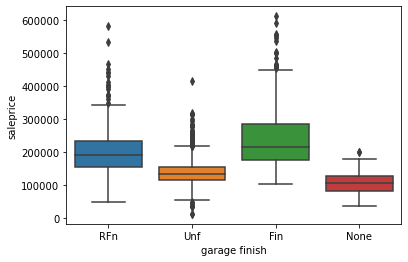

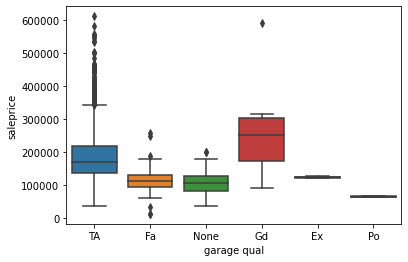

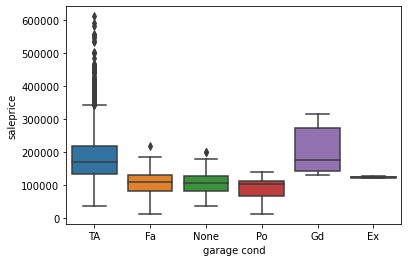

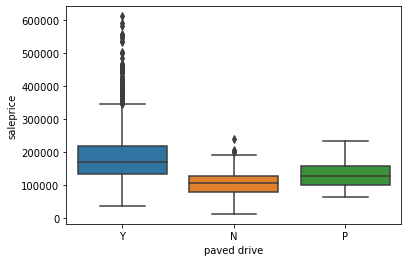

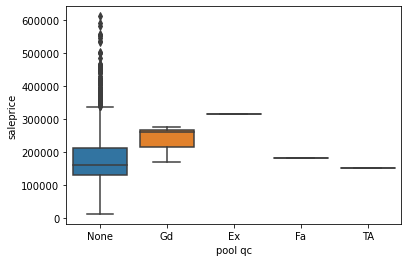

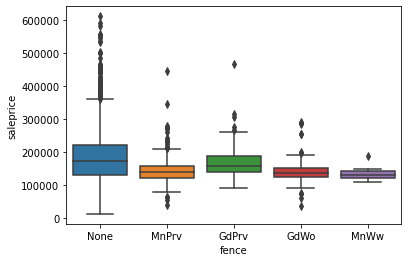

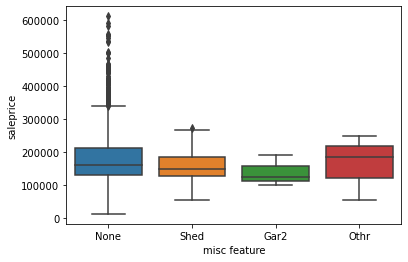

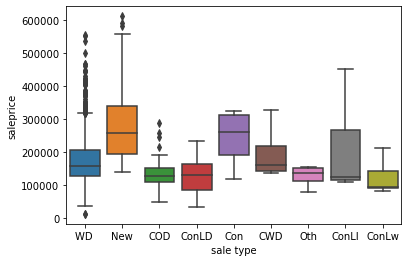

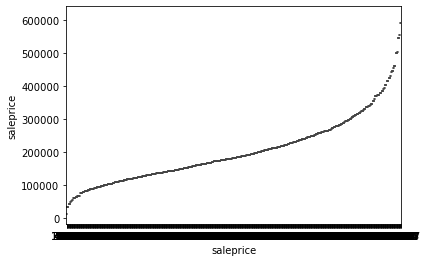

In [40]:
for col in cat_col:
    sns.boxplot(x = col, y = 'saleprice', data = df_train)
    plt.show()

In [41]:
#The column that I choose
cat_col_selected = ['ms zoning', 'exter qual', 'exter cond', 'bsmt qual',
                    'heating', 'central air', 'kitchen qual', 'bsmt exposure',
                    'neighborhood', 'heating qc', 'fireplace qu', 'electrical']

### 1.6 Correlation

The correlation data frame named `corr` shows the correlation between the sale price and the numerical feature type. The correlation that I select to build the model is over 0.5.

In [42]:
corr = pd.DataFrame({'column':df_train.describe().columns, 'correlation': df_train.corr()['saleprice']}).sort_values(by = 'correlation', ascending = False)

In [43]:
corr.reset_index(drop=True, inplace = True)

In [44]:
corr

,column,correlation
0,saleprice,1.000000
1,overall qual,0.805039
2,gr liv area,0.715225
3,total bsmt sf,0.669156
4,garage area,0.656710
5,garage cars,0.651665
6,1st flr sf,0.649916
7,year built,0.587512
8,year remod/add,0.554741
9,full bath,0.537201


## 2. Model preparation

- The instance of models are created.
- `lr` : Linear regression
- `ridge` : RidgeCV
- `lasso` : LassoCV

In [45]:
lr = LinearRegression()

ridge = RidgeCV(alphas = np.linspace(0.1, 10, 100))

lasso = LassoCV(n_alphas = 100)

## Model 1

### Features setting

- The features are the columns that have a correlation between the column and sale price more than 0.5. The column names are in 'features_1' which are used as the predictor.
- The target is 'saleprice'.
- The predictor for test data is 'X_test'. The predictors are the data from df_test and the column in 'features_1'.

In [46]:
#Filter only the features which have correlation over 0.5
corr_col = list(corr[(corr['correlation'] > 0.5) & (corr['correlation'] < 1)]['column'])

In [47]:
features_1 = corr_col

In [48]:
features_1

['overall qual',
 'gr liv area',
 'total bsmt sf',
 'garage area',
 'garage cars',
 '1st flr sf',
 'year built',
 'year remod/add',
 'full bath',
 'mas vnr area',
 'totrms abvgrd']

In [49]:
X = df_train[features_1]
y = df_train['saleprice']
X_df_test = df_test[features_1]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [51]:
X_train.shape

(1810, 11)

In [52]:
X_test.shape

(202, 11)

### Scaling

- The `StandardScaler()` is used to scale to value in feature columns to be on the same scale (0-1).

In [53]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
X_df_test_sc = ss.transform(X_df_test)

### Model fitting and Evaluation

- R-square from 3 models is not much difference (around 0.84 on training data) that mean all model have the accuracy about at 84% on training data.
- The R-square of training data is higher than R-square on testing data. This means the model overfits.
- The RMSE of the 3 models are not different so much. It's fine to choose any model, but I choose Lasso to help me filter the features for model 2.
- From the Lasso model, the scatter plot shows the prediction has some error, and the residual graph is the normal distribution and the 50 percentile is nearly 0.

In [54]:
def model(X, y,X_test, y_test, cv =5):
    
    """This function can fit model and calculate R-square and RMSE for linear regression,
    Ridge and Lasso.
    X = dataframe of predictor
    y = target"""
    
    """Linear Regression"""
    print('Linear Regression')
    lr.fit(X,y)
    R2_lr = lr.score(X,y)
    print('R2 on training data: ', R2_lr)
    R2_test = lr.score(X_test, y_test)
    print('Linear R2 on testing data: ', R2_test)
    lr_rmse_cv_score = np.abs(cross_val_score(lr, X, y, cv = 5, scoring = 'neg_root_mean_squared_error')).mean()
    print('Linear rmse: ', lr_rmse_cv_score)
    print('')
    
    """Ridge"""
    print('Ridge Regression')
    ridge.fit(X,y)
    R2_ridge = ridge.score(X,y)
    print('R2 on training data: ', R2_ridge)
    R2_test = ridge.score(X_test, y_test)
    print('Ridge R2 on testing data: ', R2_test)
    ridge_rmse_cv_score = np.abs(cross_val_score(ridge, X, y, cv = 5, scoring = 'neg_root_mean_squared_error')).mean()
    print('Ridge rmse: ', ridge_rmse_cv_score)
    print('')
    
    """Lasso"""
    print('Lasso Regression')
    lasso.fit(X,y)
    R2_lasso = lasso.score(X,y)
    print('R2 on training data: ', R2_lasso)
    R2_test = lasso.score(X_test, y_test)
    print('Lasso R2 on testing data: ', R2_test)
    lasso_rmse_cv_score = np.abs(cross_val_score(lasso, X, y, cv = 5, scoring = 'neg_root_mean_squared_error')).mean()
    print('Lasso rmse: ', lasso_rmse_cv_score)

In [55]:
model(X_train_sc, y_train, X_test_sc, y_test)

Linear Regression
R2 on training data:  0.8449026364810206
Linear R2 on testing data:  0.7609010493472357
Linear rmse:  31434.14190338744

Ridge Regression
R2 on training data:  0.844881852607136
Ridge R2 on testing data:  0.7615897956628761
Ridge rmse:  31429.924968025713

Lasso Regression
R2 on training data:  0.84476530260039
Lasso R2 on testing data:  0.7626750148595394
Lasso rmse:  31416.646775496054


In [56]:
lasso.alpha_

194.4111278271453

In [57]:
ridge.alpha_

9.8

In [58]:
def graph_pred(X,y, model):
    
    """This function plot the scatter plot between actual values and predicted values
    X = dataframe of predictor
    y = the target
    model = type of model (linear regression, Ridge, Lasso)
    """
    
    plt.figure(figsize=(12,9))
    plt.scatter(model.predict(X), y, s=5, color='blue')
    plt.plot([0, np.max(y)],
             [0, np.max(y)],
             color = 'black')
    plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
    plt.ylabel("Actual Values: $y$", fontsize = 20)
    plt.title('Predicted Values vs. Actual Values', fontsize = 24)
    plt.show();

In [59]:
def graph_residual(X,y, model):
    
    """This function plot the histogram of residual
    X = dataframe of predictor
    y = the target
    model = type of model (linear regression, Ridge, Lasso)
    """
    
    residuals = y - (model.predict(X))
    plt.hist(residuals, bins = 20)
    plt.title('Residual')
    plt.show();

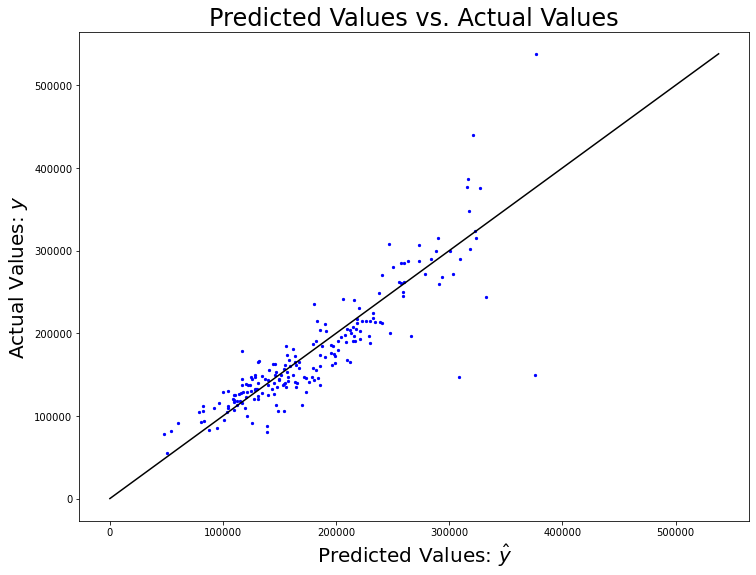

In [60]:
graph_pred(X_test_sc, y_test, lasso)

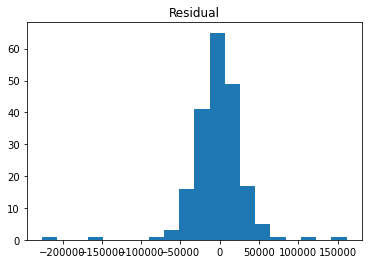

In [61]:
graph_residual(X_test_sc, y_test, lasso)

### Prediction

- Lasso model can help me filter features. The bar chart shows that 'garage cars', 'totrms abvgrd' and 'full bath' should be filtered out.
- The result of the prediction is exported to .csv file named submission_1. The score on Kaggle is 33996.03805.

In [62]:
def lasso_coef(index):
    pd.Series(lasso.coef_, index = index).sort_values(ascending = False).plot(kind = 'bar', figsize = (15,7))
    plt.title('Lasso coefficient', fontsize = 10)
    plt.ylabel('coefficient', fontsize = 10)
    plt.xlabel('feature', fontsize = 10)
    plt.show();

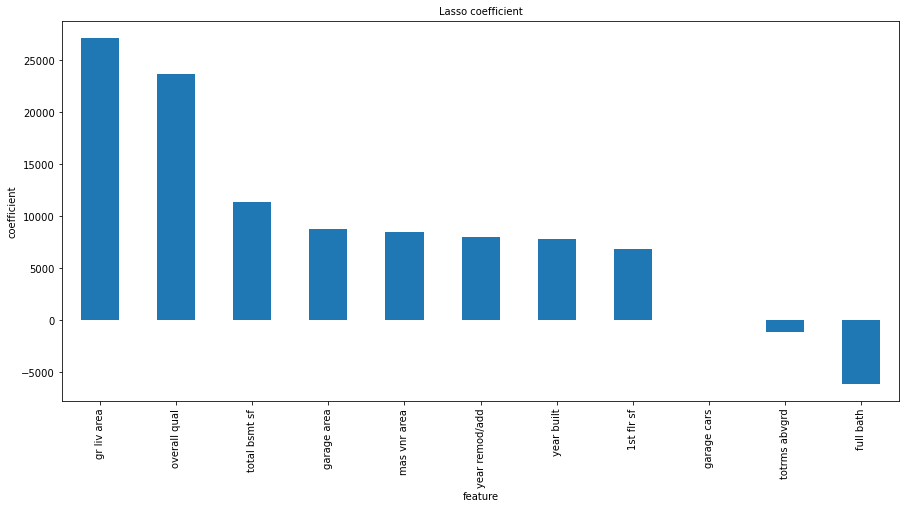

In [63]:
lasso_coef(features_1)

In [64]:
predict = lasso.predict(X_df_test_sc)

In [65]:
result = pd.DataFrame({'id': df_test['id'], 'SalePrice': predict})

In [66]:
result.to_csv('submission_1.csv', index = False)

## Model 2 

### Features setting

- The features are the columns have coefficient with sale price more than 0 from the Lasso model, and the features are selected from the categorical column which are stored in a variable named `cat_col_selected`.

In [67]:
features_2 = ['overall qual', 'gr liv area','garage area','total bsmt sf','1st flr sf',
              'year built','year remod/add'] + cat_col_selected

### OneHotEncoder

- The column in `cat_col_selected` need to use one-hot encoder so I use `OneHotEncoder()` to dummy and drop the first column.
- I choose the dummy for all `cat_col_selected` because I want to know the increasing price after changing or upgrading the quality. If I convert the ordinal columns into an integer, I cannot know the price of sale when I build upgrade kitchen quality such as upgrading from 'Po'(Poor) to 'Ex'(Excellent).
- `df_training_encoder` and `df_testing_encoder` are the dataframe of dummy.
- `df_train_model` and `df_test_model` are the dataframe from concatnation between ordiginal dataframe (`df_train` and `df_test`) and the dataframe from encoder (`df_training_encoder` and `df_testing_encoder`).

In [68]:
encoder_training = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder_training.fit(df_train[cat_col_selected])
df_training_encoder = pd.DataFrame(encoder_training.transform(df_train[cat_col_selected]),
                                   columns = encoder_training.get_feature_names(df_train[cat_col_selected].columns))
df_testing_encoder = pd.DataFrame(encoder_training.transform(df_test[cat_col_selected]),
                                   columns = encoder_training.get_feature_names(df_test[cat_col_selected].columns))

In [69]:
df_training_encoder

,ms zoning_A (agr),ms zoning_C (all),ms zoning_FV,ms zoning_I (all),ms zoning_RH,ms zoning_RL,ms zoning_RM,exter qual_Ex,exter qual_Fa,exter qual_Gd,...,fireplace qu_Fa,fireplace qu_Gd,fireplace qu_None,fireplace qu_Po,fireplace qu_TA,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
df_train_model = pd.concat([df_train, df_training_encoder], axis=1)

In [71]:
df_train_model.head()

,id,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,...,fireplace qu_Fa,fireplace qu_Gd,fireplace qu_None,fireplace qu_Po,fireplace qu_TA,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr
0,109,60,RL,68.0,13517,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,544,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,153,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,318,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,255,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
df_test_model = pd.concat([df_test, df_testing_encoder], axis=1)

In [73]:
df_test_model.head()

,id,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,...,fireplace qu_Fa,fireplace qu_Gd,fireplace qu_None,fireplace qu_Po,fireplace qu_TA,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr
0,2658,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2718,90,RL,68.0,9662,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2414,60,RL,58.0,17104,Pave,None,IR1,Lvl,AllPub,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1989,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,625,20,RL,68.0,9500,Pave,None,IR1,Lvl,AllPub,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Features setting after OneHotEncoder

- The features are the columns that have a Lasso coefficient more than 0 from model 1 and the dummied columns.
- The target is 'saleprice'.
- The predictor for test data is 'X_test'. The predictors are the data from df_test_model and the column in 'features_1'.

In [74]:
features_2 = ['overall qual', 'gr liv area','garage area','total bsmt sf','1st flr sf',
              'year built','year remod/add'] + list(df_training_encoder.columns)

In [75]:
y_2 = df_train_model['saleprice']
X_2 = df_train_model[features_2]
X_df_test_2 = df_test_model[features_2]

In [76]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size = 0.1, random_state = 42)

In [77]:
X_train_2.shape

(1810, 89)

In [78]:
X_test_2.shape

(202, 89)

### Scaling

- The `StandardScaler()` is used to scale to value in feature columns to be in the same scale (0-1).

In [79]:
ss = StandardScaler()
ss.fit(X_train_2)
X_train_sc_2 = ss.transform(X_train_2)
X_test_sc_2 = ss.transform(X_test_2)
X_df_test_sc_2 = ss.transform(X_df_test_2)

### Model fitting and Evaluation
- All models have mode efficiency at 90% for training data, but they also have more overfit.
- The alpha of Lasso decreases when compared with model 1.
- The increasing of feature improves the accuracy but also make the model overfits.

In [80]:
model(X_train_sc_2,y_train_2, X_test_sc_2, y_test_2)

Linear Regression
R2 on training data:  0.9068526852543879
Linear R2 on testing data:  0.8478004894877978
Linear rmse:  7.841575632778682e+16

Ridge Regression
R2 on training data:  0.906852206555349
Ridge R2 on testing data:  0.8483773909414956
Ridge rmse:  25270.510903381568

Lasso Regression
R2 on training data:  0.9065298151630463
Lasso R2 on testing data:  0.8510627565849391
Lasso rmse:  25160.54018886906


In [81]:
lasso.alpha_

157.69285962919244

In [82]:
ridge.alpha_

10.0

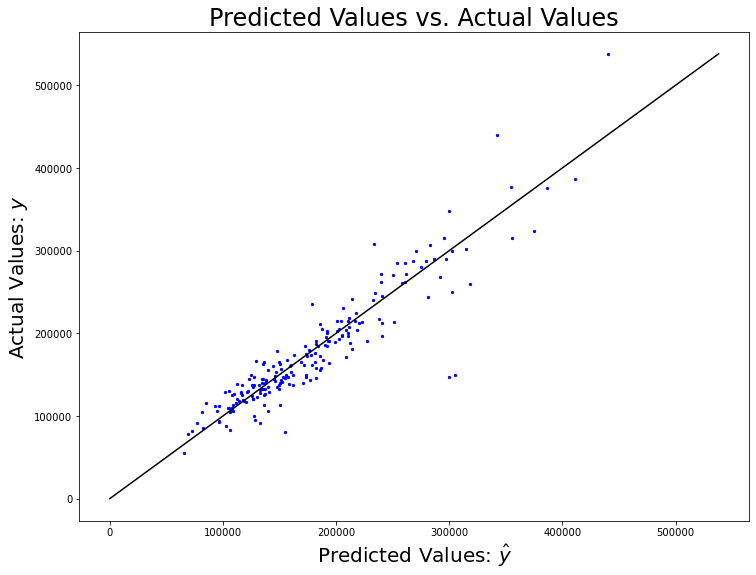

In [83]:
graph_pred(X_test_sc_2, y_test_2, lasso)

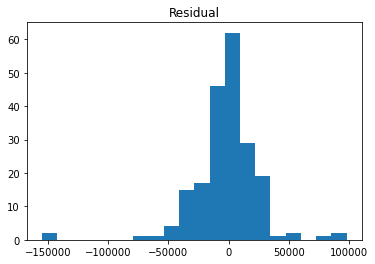

In [84]:
graph_residual(X_test_sc_2, y_test_2, lasso)

### Prediction
- I choose Lasso for prediction. 
- The bar chart shows the neighborhood has more effect of the negative way for sale price because the coefficient usually stays on the negative values.
- The prediction result is exported as .csv file named submission_2 and the score in Kaggle is 30030.91333. This score is better than model 1.

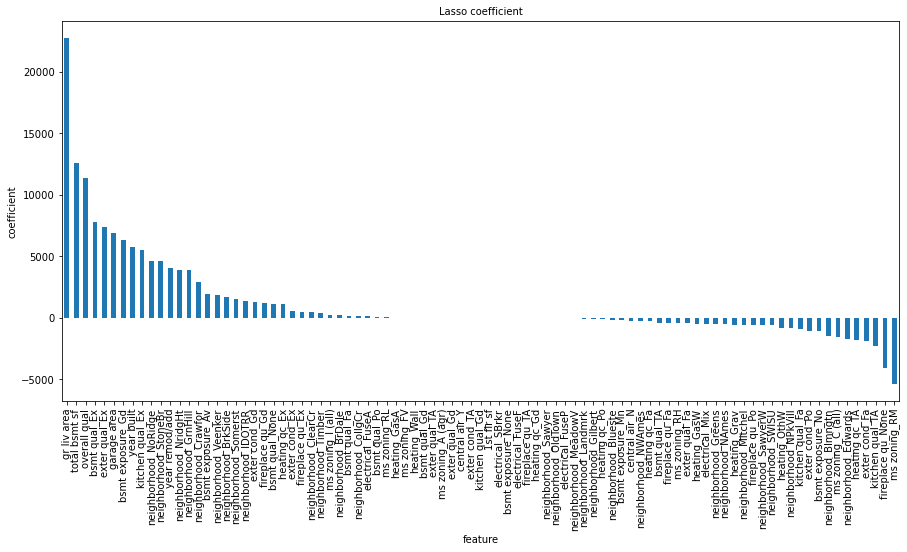

In [85]:
lasso_coef(features_2)

In [86]:
predict_2 = lasso.predict(X_df_test_sc_2)

In [87]:
predict_2

array([136327.98058292, 204774.15976058, 194733.89426295, 103994.21196305,
       174415.46636617,  85429.88378931, 100043.91325611, 155545.8066738 ,
       200974.30225975, 155915.55691687, 162763.50793495, 121686.62978833,
       165986.88206278, 291686.10249994, 168969.8802589 , 127460.54752923,
       146466.48350655, 113104.16436688, 184703.61678194, 173584.70399422,
       151540.65283541, 124009.96366062, 203880.17033984, 173602.86298662,
       182184.00257586, 118159.40880374, 154021.54388096, 140962.81444855,
       167300.92638294,  56410.29166106, 110084.783045  , 101822.82455664,
       221339.13799241, 156151.71551384, 215179.78821519, 173837.3142874 ,
       124304.39845112,  82401.94272331, 107411.09183183, 199822.38921459,
       172443.96892068, 205829.98609935, 156722.45575828, 149830.79123617,
       215979.05906061, 102810.07049694, 212531.05315338, 104942.57846224,
       120799.48546713, 120814.24264552, 100440.98578061, 186240.2467959 ,
       252516.42337572, 1

In [88]:
result = pd.DataFrame({'id': df_test['id'], 'SalePrice': predict_2})

In [89]:
result.to_csv('submission_2.csv', index = False)

In [90]:
#Lasso coeficient

coef_model_2 = pd.DataFrame({'column': features_2,'coef':lasso.coef_})
coef_model_2.sort_values(by='coef', ascending = False)[30:]

,column,coef
24,bsmt qual_Fa,191.246960
50,neighborhood_CollgCr,183.582085
84,electrical_FuseA,169.499969
27,bsmt qual_Po,113.797621
12,ms zoning_RL,111.908276
29,heating_GasA,0.289681
65,neighborhood_OldTown,-0.000000
67,neighborhood_Sawyer,0.000000
83,fireplace qu_TA,0.000000
85,electrical_FuseF,0.000000


### Model 3

- Try to use log transformation.

#### Sale price distribution

- As the assumption of linear regression, log transformation is used to adjust the saleprice value to be more linear and normal distribution.

In [91]:
def distribution_sale(column):
    
    """This function plot the distribution and QQ plot.
    column = column in dataframe"""
    
    sns.distplot(column , fit=norm);
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(column)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')
    
    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(column, plot=plt)
    plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180442.73 and sigma = 77968.83



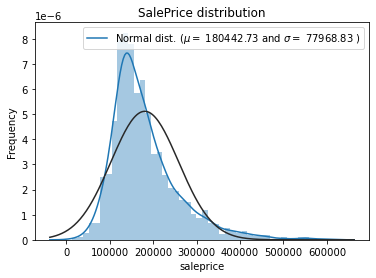

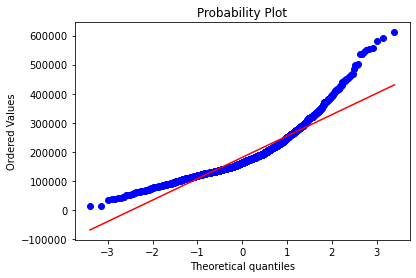

In [92]:
# Original sale price distribution
distribution_sale(df_train['saleprice'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.41



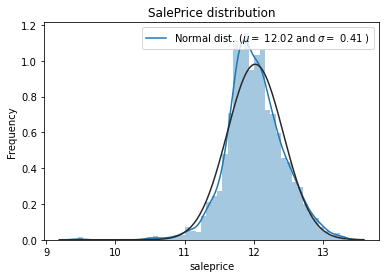

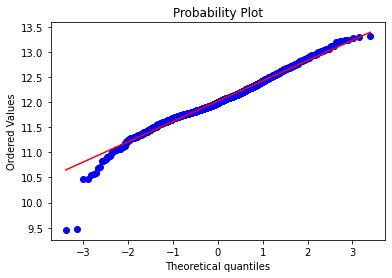

In [93]:
# Log transformation : Sale price has better distribution.
distribution_sale(np.log(df_train['saleprice']))

### Features setting

- features_3 is the same as features_2 but the target is added to the log transformation. This is because the target (sale price) does not normal distribution, it is a positive distribution.

In [94]:
features_3 = features_2

In [95]:
y_3 = np.log(df_train_model['saleprice'])
X_3 = df_train_model[features_3]
X_df_test_3 = df_test_model[features_3]

In [96]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,y_3, test_size = 0.1, random_state = 42)

In [97]:
X_train_3.shape

(1810, 89)

In [98]:
X_test_3.shape

(202, 89)

In [99]:
X_df_test_3.shape

(879, 89)

### Scaling

- The `StandardScaler()` is used to scale to value in feature columns to be in the same scale (0-1).

In [100]:
ss = StandardScaler()
ss.fit(X_train_3)
X_train_sc_3 = ss.transform(X_train_3)
X_test_sc_3 = ss.transform(X_test_3)
X_df_test_sc_3 = ss.transform(X_df_test_3)

### Model fitting and Evaluation
- All models have mode efficiency at 90% for training data, but they also have more overfit.
- Lasso and Ridge provide the best R-square and RMSE, so I choose Lasso to predict the price.

In [101]:
model(X_train_sc_3,y_train_3, X_test_sc_3, y_test_3)

Linear Regression
R2 on training data:  0.9076880295169286
Linear R2 on testing data:  0.8343412452403224
Linear rmse:  364684626168.78876

Ridge Regression
R2 on training data:  0.907711430199991
Ridge R2 on testing data:  0.8340577306946904
Ridge rmse:  0.1440645061409937

Lasso Regression
R2 on training data:  0.9064128728186647
Lasso R2 on testing data:  0.8398726690740876
Lasso rmse:  0.1426081447109504


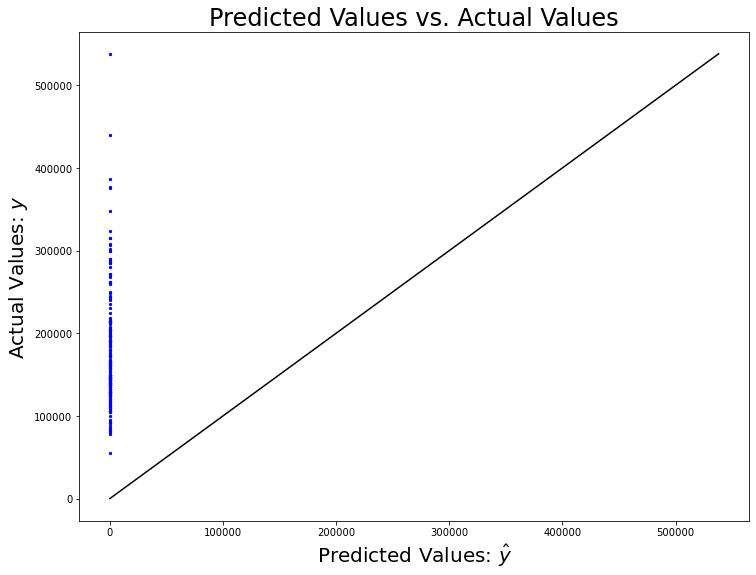

In [102]:
graph_pred(X_test_sc_3, np.exp(y_test_3), lasso)

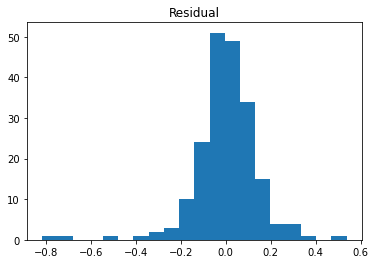

In [103]:
graph_residual(X = X_test_sc_3, y = y_test_3, model = lasso)

### Prediction
- Lasso's alpha is nearly 0.
- The result of the prediction gets the score on Kaggle at 23706.44408.
- Even if the accuracy decreases, the score on Kaggle is better than the previous models.

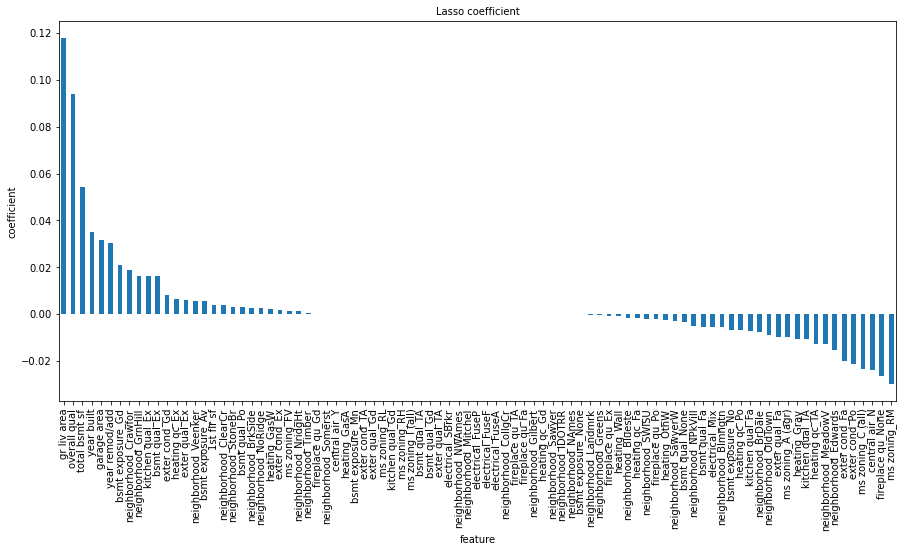

In [104]:
lasso_coef(features_3)

In [105]:
#Lasso coefficient

coef_model_3 = pd.DataFrame({'column': features_3,'coef':np.exp(lasso.coef_)})
coef_model_3[coef_model_3['coef'] >0].sort_values(by='coef', ascending = False)[:40]

,column,coef
1,gr liv area,1.125026
0,overall qual,1.098346
3,total bsmt sf,1.055842
5,year built,1.035671
2,garage area,1.032073
6,year remod/add,1.031009
41,bsmt exposure_Gd,1.021057
51,neighborhood_Crawfor,1.019023
55,neighborhood_GrnHill,1.016499
36,kitchen qual_Ex,1.016395


In [106]:
lasso.intercept_

12.020753749051815

In [107]:
lasso.alpha_

0.002098133580619748

In [108]:
ridge.alpha_

10.0

In [109]:
predict_3 = np.exp(lasso.predict(X_df_test_sc_3))

In [110]:
predict_3

array([105563.05235529, 188425.83067403, 194793.37694059, 110273.33658339,
       167219.18527157,  90545.18787622, 106831.42503829, 146894.69779655,
       197250.4658517 , 158559.71131771, 159575.70950432, 123527.54372367,
       162520.2407719 , 297111.16113563, 152632.74911274, 124313.76292499,
       136627.12725299, 114847.9552624 , 181869.34722189, 168955.73139298,
       151910.86488034, 126038.27109632, 201266.51791558, 165963.9515715 ,
       182570.34800443, 121202.4386683 , 148864.90325113, 121625.53870707,
       158005.06978464,  73680.67246643, 115103.75622446, 103014.39312198,
       198840.90898411, 155212.17830762, 217907.90417089, 177334.04015536,
       107519.68978464,  80386.94006466, 119660.11049065, 194017.74828996,
       165496.84087481, 209401.64028605, 153001.03754489, 150581.00715648,
       211657.45935459, 102555.50643377, 216864.34431081, 118571.17520031,
       127881.12113924, 124295.99766863, 106917.59737611, 177838.08829881,
       261933.48953039, 1

In [111]:
result = pd.DataFrame({'id': df_test['id'], 'SalePrice': predict_3})

In [112]:
result.to_csv('submission_3.csv', index = False)

## Business recommendation

- **Which features appear to add the most value to a home?**

The top 5 of features that provide the high value of house are following this table.

|Feature|Meaning|Coefficient (log transformation)|
|---|---|---|
|**gr liv area**|*Above grade (ground) living area square feet*|1.125026|
|**overall qual**|*Rates the overall material and finish of the house*|1.098346|
|**total bsmt sf**|*Total square feet of basement area*|1.055842|
|**year built**|*Original construction date*|1.035671|
|**garage area**|*Size of garage in square feet*|1.032073|

- **Which features hurt the value of a home the most?**

The top 5 features of losers are presented following this table. 

|Feature|Meaning|Coefficient (log transformation)|
|---|---|---|
|**exter cond_Po**|*Evaluates the present condition of the material on the exterior (Poor)*|0.978867| 
|**ms zoning_C (all)**|*Identifies the general zoning classification of the sale (Commercial)*|0.976815|
|**central air_N**|*Central air conditioning (No)*|0.976480|
|**fireplace qu_None**|*Fireplace quality (None)*|0.973895|
|**ms zoning_RM**|*Size of garage in square feet (Residential Medium Density)*|0.970536|

- **What are things that homeowners could improve in their homes to increase the value?**

My suggestion based on the coefficient and the meaning of features. The feature of the area and main construction are quite difficult to be improved. Therefore, I recommend some features that do not disrupt the main structure of the house and still have a high coefficient.

1. Basement exposure
2. Kitchen quality
3. Heating quality
4. Exterior condition
5. Adding wood deck area or porch

- **What neighborhoods seem like they might be a good investment?**

The neighborhood that people prefer is presented in the following table. The neighborhood in the table gives a positive effect on the house price. Northridge is the most popular location that increases the house price \$4911.

|No.|Neighborhood|Incresing of house price (log transformation)|
|---|---|---|
|1|**Crawford**|1.019023|
|2|**Green Hills**|1.016499|
|3|**Veenker**|1.005817|
|4|**ClearCr**|1.003795|
|5|**Stone Brook**|1.003001|
|6|**Brookside**|1.002757|
|7|**Northridget**|1.002630|
|8|**Northridge Heights**|1.001136|
|9|**Timberland**|1.000271|
|10|**Somerset**|1.000014|

- **Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?**

This model cannot predict the house price in another city because the training data was collected from Ames Iowa only. Some features need to be adjusted and removed. For example, neighborhood in the training data is the specific areas are found in Ames Iowa, so the neighborhood might be change to the environment around the house i.e. school, shopping mall and bus stop. The location of the house in term of longitude and latitude also gives the advantage because everywhere has this data and this data will help to specify the location of the house. This has more accuracy than the zoning of the house.

## Conclusions and Recommendations

**Model comparison**

- Model 1 : The accuracy is 84% on training data, but the model feature is needed to be adjusted and get more accuracy. The alphas of Ridge and Lasso are so high that means the model still has some error, this can be confirmed by RMSE which is around 31000.

- Model 2 : The accuracy is 90% on training data that higher than R-square on testing data. This might the model is overfitting. The alpha of lasso decreases from model 1. The increasing of features in this model can increase accuracy but also increase the overfit.

- Model 3: As the sale price distribution is not a normal distribution. The log transformation can help to adjust the distribution and get a better prediction result.

**Feature comparison**

- The size of the area is the main feature to increase the house price including ground living area, total basement area and area around the house.
- People love to buy a new house so the estate company should build a new house instead of renovating the old house.
- If the house owner and estate company would like to increase the house price but cannot expand the area, quality improvement is the best way for this problem such as exterior quality, basement exposure, kitchen quality, heating quality and adding the wood deck or porch.
- The zone that will decrease the house price is Commercial and Residential Medium Density, so the estate company should avoid investing in these zones. Moreover, the house with low quality of exterior, fireplace and central air tends to have a low price.

**Limitation of this model**

- This model is trained from the data in Ames Iowa, so this model cannot predict the house price in another city. 
- It requires some adjustment such as increasing the longitude and latitude or the environment around the house (school, hospital and park). This will help this model to be a universal model.